# EEG-Stimuli

## Load Dataset

### View Dataset Attributes

In [1]:
from lib import *
import scipy.io

usable_datasets = get_usable_datasets("./dataset/datasets.mat")

### Load EEG Listening Example

In [5]:
import matplotlib.pyplot as plt
import scipy.io

data = scipy.io.loadmat("./dataset/S13.mat")
data = data["raw"][0][0][3][0][0]
data.shape

(62, 368275)

In [6]:
data.shape[1] / 500

736.55

### Preprocessing Info

In [7]:
proc = scipy.io.loadmat("./dataset/proc/S13.mat")
proc["proc"]

array([[(array(['29'], dtype='<U2'), array([[array(['25'], dtype='<U2'), array(['29'], dtype='<U2')]],
              dtype=object), array(['S13'], dtype='<U3'), array([], dtype='<U1'), array([[ 4.13900000e+03,  4.78900000e+03, -1.50000000e+02,
                 1.00000000e+00,  4.60000000e-02,  1.00000000e+00],
               [ 4.39800000e+03,  5.04800000e+03, -1.50000000e+02,
                 1.00000000e+00,  5.62721000e-01,  2.00000000e+00],
               [ 4.50900000e+03,  5.15900000e+03, -1.50000000e+02,
                 1.00000000e+00,  7.84543000e-01,  3.00000000e+00],
               ...,
               [ 3.65672000e+05,  3.66322000e+05, -1.50000000e+02,
                 1.20000000e+01,  4.58968292e+01,  2.14800000e+03],
               [ 3.65756000e+05,  3.66406000e+05, -1.50000000e+02,
                 1.20000000e+01,  4.60644482e+01,  2.14900000e+03],
               [ 3.65887000e+05,  3.66537000e+05, -1.50000000e+02,
                 1.20000000e+01,  4.63278492e+01,  2.15000000

### Get Total Audio Length

In [5]:
import librosa
import os

sr = 22_050

audio_fis = os.listdir("./dataset/audio")
audio_fis = [os.path.join("./dataset/audio/", fi) for fi in audio_fis]
print(audio_fis)

audio_lens = [librosa.load(fi)[0].shape[0] / sr for fi in audio_fis]
print(audio_lens)

audio_lens

KeyboardInterrupt: 

### Get Audio File Stats

In [10]:
import librosa

audio_fis = os.listdir("./dataset/audio")
audio_fis = [os.path.join("./dataset/audio/", fi) for fi in audio_fis]

s, sr = librosa.load(audio_fis[0])
print(sr)

22050


In [5]:
sum(audio_lens)

723.5405895691609

## Visualise Dataset

723.54 seconds of audio \
736.55 seconds of EEG (S13) \
733.05 seconds of EEG (S01) \
734.60 seconds of EEG (S03)

### Pre-processing and Alignment

In [8]:
proc = scipy.io.loadmat("./dataset/proc/S13.mat")
proc

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Nov 20 13:10:19 2018',
 '__version__': '1.0',
 '__globals__': [],
 'proc': array([[(array(['29'], dtype='<U2'), array([[array(['25'], dtype='<U2'), array(['29'], dtype='<U2')]],
               dtype=object), array(['S13'], dtype='<U3'), array([], dtype='<U1'), array([[ 4.13900000e+03,  4.78900000e+03, -1.50000000e+02,
                  1.00000000e+00,  4.60000000e-02,  1.00000000e+00],
                [ 4.39800000e+03,  5.04800000e+03, -1.50000000e+02,
                  1.00000000e+00,  5.62721000e-01,  2.00000000e+00],
                [ 4.50900000e+03,  5.15900000e+03, -1.50000000e+02,
                  1.00000000e+00,  7.84543000e-01,  3.00000000e+00],
                ...,
                [ 3.65672000e+05,  3.66322000e+05, -1.50000000e+02,
                  1.20000000e+01,  4.58968292e+01,  2.14800000e+03],
                [ 3.65756000e+05,  3.66406000e+05, -1.50000000e+02,
                  1.20000000e+01,  4.60

In [13]:
# Max Segments := 2150

proc_data = proc["proc"]
proc_data_segs = proc_data[0][0][4]
print(len(proc_data_segs))
for i in range(len(proc_data_segs)):
    print(proc_data_segs[i][-1])

2129
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0
185.0
186.

In [46]:
proc2 = scipy.io.loadmat("./dataset/proc/S01.mat")
proc2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Nov 20 13:10:15 2018',
 '__version__': '1.0',
 '__globals__': [],
 'proc': array([[(array(['29'], dtype='<U2'), array([[array(['25'], dtype='<U2'), array(['29'], dtype='<U2')]],
               dtype=object), array(['S01'], dtype='<U3'), array([], dtype='<U1'), array([[ 1.73600000e+03,  2.38600000e+03, -1.50000000e+02,
                  1.00000000e+00,  4.60000000e-02,  1.00000000e+00],
                [ 1.99500000e+03,  2.64500000e+03, -1.50000000e+02,
                  1.00000000e+00,  5.62721000e-01,  2.00000000e+00],
                [ 2.10600000e+03,  2.75600000e+03, -1.50000000e+02,
                  1.00000000e+00,  7.84543000e-01,  3.00000000e+00],
                ...,
                [ 3.63237000e+05,  3.63887000e+05, -1.50000000e+02,
                  1.20000000e+01,  4.58968292e+01,  2.14800000e+03],
                [ 3.63321000e+05,  3.63971000e+05, -1.50000000e+02,
                  1.20000000e+01,  4.60

### Segments

In [47]:
# Max Segments := 2150

proc_data = proc2["proc"]
proc_data_segs = proc_data[0][0][4]
proc_data_segs[0], proc_data_segs[1], proc_data_segs[2]

(array([ 1.736e+03,  2.386e+03, -1.500e+02,  1.000e+00,  4.600e-02,
         1.000e+00]),
 array([ 1.99500e+03,  2.64500e+03, -1.50000e+02,  1.00000e+00,
         5.62721e-01,  2.00000e+00]),
 array([ 2.10600e+03,  2.75600e+03, -1.50000e+02,  1.00000e+00,
         7.84543e-01,  3.00000e+00]))

### Visualise Electrodes - Entire Recording

In [43]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
print(data.shape[0])

def go(data, s_off, e_off):
    for i in list(range(data.shape[0]))[1:60]:
        # plt.plot(data[i, s_off:data.shape[1]-e_off])
        plt.plot(data[i, s_off:e_off])

62


(736.55, 12.0, 16.549999999999955)

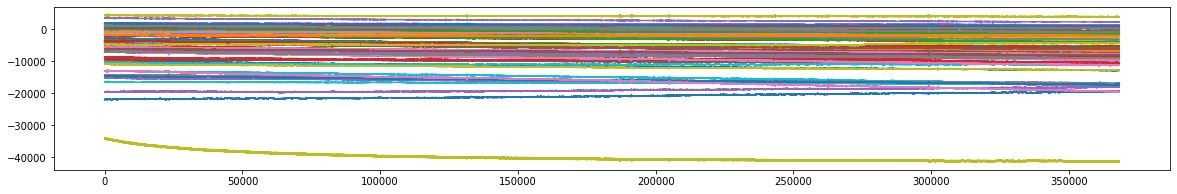

In [27]:
go(data, 0, -1)
data_secs = data.shape[1] / 500
data_secs, data_secs // 60, data_secs % 60

## Segment Analysis

### Load Dataset

In [1]:
from lib import *
dataset = BrennanDataset(
    root_dir="./dataset/",
    idx="S13") # , max_items=176)

1 57.540625
2 60.84525
3 63.2594375
4 69.988625
5 66.2725625
6 63.7775625
7 62.896875
8 57.310625
9 57.2261875
10 61.2696875
11 56.1701875
12 46.9830625


### Analysis

In [29]:
first_seg = dataset[len(dataset)-1]

(20800,)


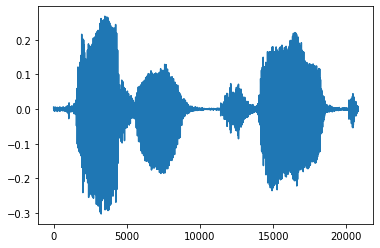

In [30]:
import matplotlib.pyplot as plt
print(first_seg["audio_raw"].shape)
plt.plot(first_seg["audio_raw"])

In [32]:
from matplotlib import cm

def plot_mel_spectrogram(mel_spec, title):
    fig, ax = plt.subplots(1)

    ax.set_title(f"Mel Spectogram \"{title}\"")
    pred = np.swapaxes(mel_spec, 0, 1)
    cax = ax.imshow(pred, interpolation='nearest', cmap=cm.coolwarm, origin='lower')

    return fig

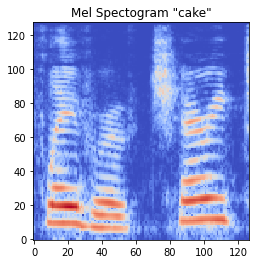

In [33]:
_ = plot_mel_spectrogram(first_seg["audio_feats"], first_seg["label"])

(60, 650)


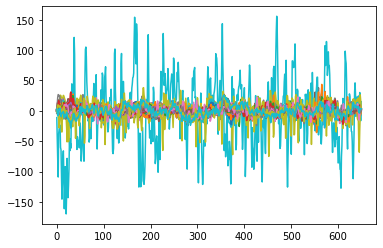

In [9]:
import matplotlib.pyplot as plt
eeg_seg = first_seg["eeg_raw"][0:60, :]
for i in range(eeg_seg.shape[0]):
    plt.plot(eeg_seg[i, :])
print(eeg_seg.shape)

(159, 310)


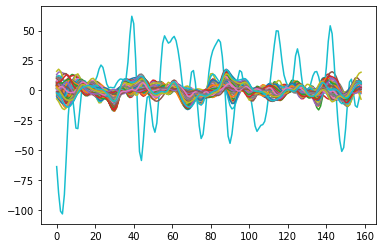

In [10]:
import matplotlib.pyplot as plt
eeg_seg = first_seg["eeg_feats"][0:60*5, :]
print(first_seg["eeg_feats"].shape)
for i in range(60):
    plt.plot(eeg_seg[:, (i*5)+0])

## Single Segment Synthesis (Overfit)

### Model

In [2]:
import torch.nn as nn
import torch.nn.functional as F

from lib.transformer import *

class ProposedModel(nn.Module):
    def __init__(self,
                 model_size,
                 dropout=0.2,
                 num_layers=6,
                 n_heads=8,
                 dim_feedforward=3072,
                 out_dim=80,
                 use_resnet=False):
        super().__init__()
        self.use_resnet = use_resnet

        if use_resnet:
            self.conv_blocks = nn.Sequential(
                ResBlock(62, model_size, 2),
                ResBlock(model_size, model_size, 2),
                ResBlock(model_size, model_size, 2),
            )
            self.w_raw_in = nn.Linear(model_size, model_size)

        encoder_layer = TransformerEncoderLayer(
            d_model=model_size,
            nhead=n_heads,
            relative_positional=True,
            relative_positional_distance=100,
            dim_feedforward=dim_feedforward,
            dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.w_out = nn.Linear(model_size, out_dim)
    
    def forward(self, x):
        # (Optional) ResNet Blocks
        if self.use_resnet:
            # x shape is (batch, time, electrode)
            x = x.transpose(1, 2)
            x = self.conv_blocks(x)
            x = x.transpose(1, 2)
            x = self.w_raw_in(x)

        # Transformer
        x = x.transpose(0, 1)
        x = self.transformer(x)
        x = x.transpose(0, 1)

        # Final MLP
        x = self.w_out(x)

        return x


class ResBlock(nn.Module):
    def __init__(self, num_ins, num_outs, stride=1):
        super().__init__()

        self.conv1 = nn.Conv1d(num_ins, num_outs, 3, padding=1, stride=stride)
        self.bn1 = nn.BatchNorm1d(num_outs)
        self.conv2 = nn.Conv1d(num_outs, num_outs, 3, padding=1)
        self.bn2 = nn.BatchNorm1d(num_outs)

        if stride != 1 or num_ins != num_outs:
            self.residual_path = nn.Conv1d(num_ins, num_outs, 1, stride=stride)
            self.res_norm = nn.BatchNorm1d(num_outs)
        else:
            self.residual_path = None

    def forward(self, x):
        input_value = x

        x = F.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))

        if self.residual_path is not None:
            res = self.res_norm(self.residual_path(input_value))
        else:
            res = input_value

        return F.relu(x + res)

In [453]:
synth_example = dataset[82]

import torch
import random

from lib.transduction import DigitalVoicingModel

electrode_slice = 60
ins = 5 * electrode_slice # 5 hand-crafted features * 62 electrodes
outs = 128 # n mels

device = "cuda" if torch.cuda.is_available() else "cpu"

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

model_type = "transformer" # "transformer" # "res-trans"

if model_type == "lstm":
    model = DigitalVoicingModel(
        ins=ins,
        model_size=128,
        n_layers=2,
        dropout=0.0,
        outs=outs).to(device)
elif model_type == "transformer":
    model = ProposedModel(\
        model_size=ins,
        dropout=0,  # 0.2,
        num_layers=8,
        n_heads=2,
        dim_feedforward=3072,
        out_dim=outs).to(device)
elif model_type == "res-trans":
    model_size = 768
    model = ProposedModel(\
        model_size=model_size,
        dropout=0.2,
        num_layers=8,
        n_heads=2,
        dim_feedforward=3072,
        out_dim=outs,
        use_resnet=True).to(device)

In [454]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.cuda.amp.grad_scaler import GradScaler

import matplotlib.pyplot as plt

print("MODEL TYPE:", model_type)

X = torch.tensor(synth_example["eeg_feats"], dtype=torch.bfloat16).to(device)
y = torch.tensor(synth_example["audio_feats"],   dtype=torch.bfloat16).to(device)

clip_len = min(X.shape[0], y.shape[0])

X = X[:clip_len, :ins]
y = y[:clip_len, :]

X = torch.unsqueeze(X, 0)
y = torch.unsqueeze(y, 0)

print(X.shape, y.shape)

lr = 5e-4 # 1e-3 # 5e-4 # 1e-3
optim = torch.optim.Adam(model.parameters(), lr=lr)

amp = True

epochs = 20_000 # 10_000

scaler = GradScaler()

criteria = nn.MSELoss()

pred_s = []
losses = []

for i in range(epochs):
    optim.zero_grad()

    with torch.autocast(
        enabled=amp,
        dtype=torch.bfloat16,
        device_type=device):

        #print("model inp:", X.shape, X.dtype)

        pred = model(X)

        #print("model outp:", pred.shape, pred.dtype)

        if y.shape[1] < pred.shape[1]:
            pred = pred[:, :y.shape[1], :]
            #print("model outp (clipped):", pred.shape, pred.dtype)
            #print("y:", y.shape)

        loss = criteria(pred, y)

        if i % 100 == 0:
            pred_s.append(pred.cpu().detach())
            losses.append(loss.item())

        # plt.plot(loss.item())

            print(i, loss.item())

    scaler.scale(loss).backward()
    scaler.step(optim)
    scaler.update()

    # scheduler.step()

MODEL TYPE: transformer
torch.Size([1, 127, 300]) torch.Size([1, 127, 128])
0 77.91375732421875
100 4.439171314239502
200 4.439065933227539
300 4.4390482902526855
400 4.439365863800049
500 4.4393534660339355
600 4.4388909339904785
700 4.4390459060668945
800 4.438960552215576
900 4.439207077026367
1000 4.439331531524658
1100 4.438943862915039
1200 4.439068794250488
1300 4.439281463623047
1400 4.438903331756592
1500 4.439441680908203
1600 4.439321517944336
1700 4.439488887786865
1800 4.43951940536499
1900 4.439244747161865
2000 4.4390339851379395
2100 4.439349174499512
2200 4.439284801483154
2300 4.439197540283203
2400 4.439279079437256
2500 4.439177513122559
2600 4.439188480377197
2700 4.43930196762085
2800 4.439157009124756
2900 4.4392409324646
3000 4.438631534576416
3100 4.439352035522461
3200 4.439248561859131
3300 4.439222812652588
3400 4.439234733581543
3500 4.439234256744385
3600 4.43923282623291
3700 4.43935489654541
3800 4.439187049865723
3900 4.4392242431640625
4000 4.439232826

KeyboardInterrupt: 

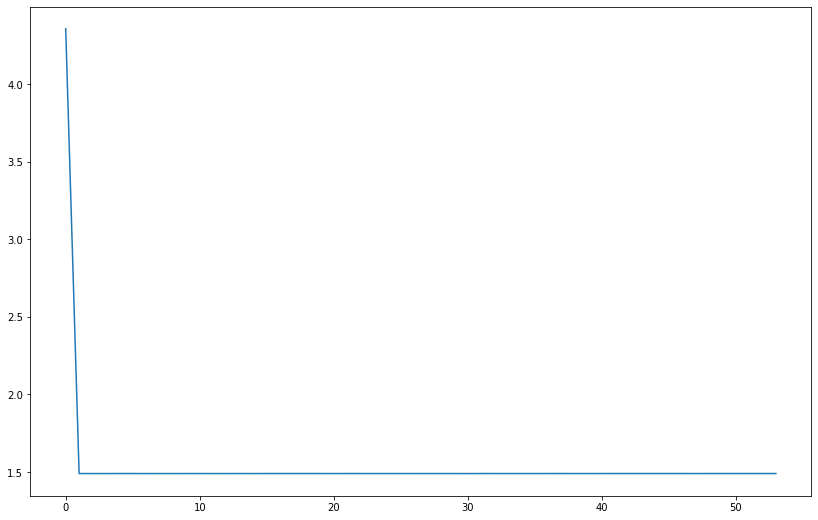

In [455]:
plt.plot(np.log(losses))

### Plot Pred

In [449]:
from matplotlib import cm

def plot_mel_spectrogram(mel_spec, title):
    fig, ax = plt.subplots(1)

    ax.set_title(f"Mel Spectogram \"{title}\"")
    pred = np.swapaxes(mel_spec, 0, 1)
    cax = ax.imshow(pred, interpolation='nearest', cmap=cm.coolwarm, origin='lower')

    return fig

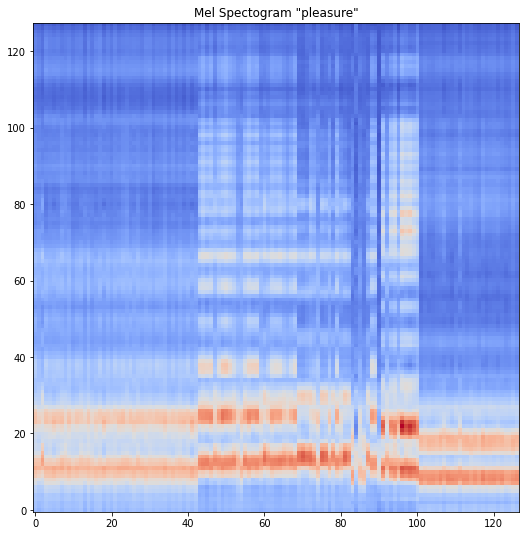

In [450]:
plt.rcParams["figure.figsize"] = (14, 9)

y = torch.squeeze(pred_s[len(pred_s) - 1], 0).float()
_ = plot_mel_spectrogram(y, synth_example["label"])

### Plot Original

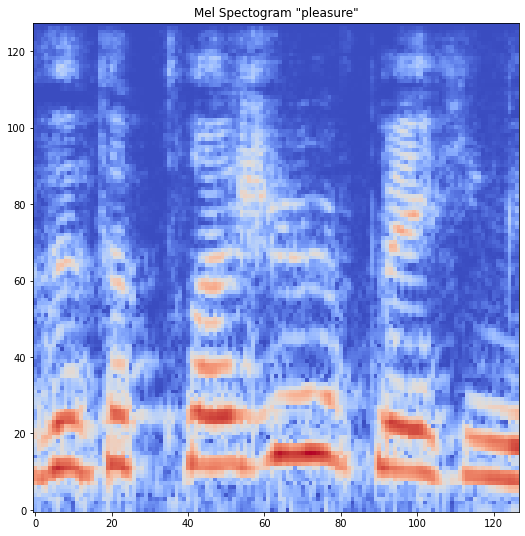

In [446]:
cur_ex = dataset[82]
_ = plot_mel_spectrogram(cur_ex["audio_feats"], cur_ex["label"])

### Save Pred

In [38]:
mel_to_save   = torch.squeeze(pred_s[len(pred_s) - 1], 0)[:, :80].float()
mel_to_save = torch.tensor(mel_to_save)
mel_fname   = synth_example["label"]
mel_fname   = mel_fname[1:-1] if mel_fname[0] == "/" else mel_fname
mel_fname   = f"{mel_fname}_pred.pt"
print(mel_to_save.shape)
torch.save(mel_to_save.T, mel_fname)

torch.Size([102, 80])


C:\Users\win8t\AppData\Local\Temp/ipykernel_11712/877487320.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mel_to_save = torch.tensor(mel_to_save)


### Visualise Saved Pred

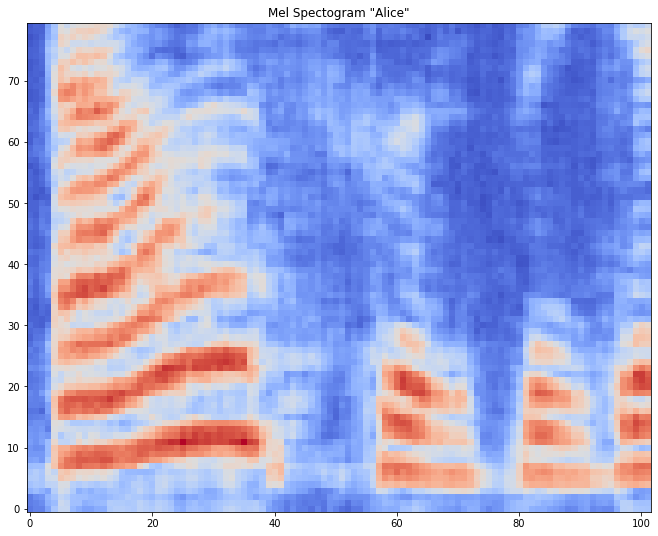

In [39]:
_ = plot_mel_spectrogram(mel_to_save, cur_ex["label"])

## Multi Segment Synthesis (Overfit)

In [10]:
import torch.nn as nn
import torch.nn.functional as F

from lib.transformer import *

class ProposedModel(nn.Module):
    def __init__(self,
                 model_size,
                 dropout=0.2,
                 num_layers=6,
                 n_heads=8,
                 dim_feedforward=3072,
                 out_dim=80,
                 use_resnet=False):
        super().__init__()
        self.use_resnet = use_resnet

        if use_resnet:
            self.conv_blocks = nn.Sequential(
                ResBlock(62, model_size, 2),
                ResBlock(model_size, model_size, 2),
                ResBlock(model_size, model_size, 2),
            )
            self.w_raw_in = nn.Linear(model_size, model_size)

        encoder_layer = TransformerEncoderLayer(
            d_model=model_size,
            nhead=n_heads,
            relative_positional=True,
            relative_positional_distance=100,
            dim_feedforward=dim_feedforward,
            dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.w_out = nn.Linear(model_size, out_dim)
    
    def forward(self, x):
        # (Optional) ResNet Blocks
        if self.use_resnet:
            # x shape is (batch, time, electrode)
            x = x.transpose(1, 2)
            x = self.conv_blocks(x)
            x = x.transpose(1, 2)
            x = self.w_raw_in(x)

        # Transformer
        x = x.transpose(0, 1)
        x = self.transformer(x)
        x = x.transpose(0, 1)

        # Final MLP
        x = self.w_out(x)

        return x


class ResBlock(nn.Module):
    def __init__(self, num_ins, num_outs, stride=1):
        super().__init__()

        self.conv1 = nn.Conv1d(num_ins, num_outs, 3, padding=1, stride=stride)
        self.bn1 = nn.BatchNorm1d(num_outs)
        self.conv2 = nn.Conv1d(num_outs, num_outs, 3, padding=1)
        self.bn2 = nn.BatchNorm1d(num_outs)

        if stride != 1 or num_ins != num_outs:
            self.residual_path = nn.Conv1d(num_ins, num_outs, 1, stride=stride)
            self.res_norm = nn.BatchNorm1d(num_outs)
        else:
            self.residual_path = None

    def forward(self, x):
        input_value = x

        x = F.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))

        if self.residual_path is not None:
            res = self.res_norm(self.residual_path(input_value))
        else:
            res = input_value

        return F.relu(x + res)

In [11]:
import torch
import random

from lib.transduction import DigitalVoicingModel

target_labels = ["of"]
synth_examples = [data for data in dataset if data["label"] in target_labels]
# print("synth_examples:", synth_examples)
electrode_slice = 60
ins = 5 * electrode_slice # 5 hand-crafted features * 62 electrodes
outs = 128 # n mels

device = "cuda" if torch.cuda.is_available() else "cpu"

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

model_type = "transformer" # "transformer" # "res-trans"

if model_type == "lstm":
    model = DigitalVoicingModel(
        ins=ins,
        model_size=128,
        n_layers=2,
        dropout=0.0,
        outs=outs).to(device)
elif model_type == "transformer":
    model = ProposedModel(\
        model_size=ins,
        dropout=0.2,
        num_layers=8,
        n_heads=2,
        dim_feedforward=3072,
        out_dim=outs).to(device)
elif model_type == "res-trans":
    model_size = 768
    model = ProposedModel(\
        model_size=model_size,
        dropout=0.2,
        num_layers=8,
        n_heads=2,
        dim_feedforward=3072,
        out_dim=outs,
        use_resnet=True).to(device)

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.nn.utils.rnn import pad_sequence

from torch.cuda.amp.grad_scaler import GradScaler

import matplotlib.pyplot as plt

print("MODEL TYPE:", model_type)

X_s = []
y_s = []

flatten = lambda lst: [item for sublist in lst for item in sublist]
ratio = 1.0
# synth_examples = flatten(synth_examples)
pivot_point = int(len(synth_examples) * ratio)

# print("synth_examples:", synth_examples)

for synth_example in synth_examples:
    X = torch.tensor(synth_example["eeg_feats"]).to(device)
    y = torch.tensor(synth_example["audio_feats"]).to(device)
    clip_len = min(X.shape[0], y.shape[0])
    X = X[:clip_len, :ins]
    y = y[:clip_len, :]
    X = torch.unsqueeze(X, 0)
    y = torch.unsqueeze(y, 0)
    X_s.append(X)
    y_s.append(y)
    
print("pivot_point:", pivot_point)
# print("PAD SEQ - X_s.shape, y_s.shape:", X_s.shape, y_s.shape)
train_X_s = X_s[:pivot_point]
train_y_s = y_s[:pivot_point]

train_X_s = pad_sequence(train_X_s, batch_first=True)
train_y_s = pad_sequence(train_y_s, batch_first=True)

train_X_s = torch.squeeze(train_X_s, 1)
train_y_s = torch.squeeze(train_y_s, 1)

lr = 5e-4 # 1e-3 # 5e-4 # 1e-3
optim = torch.optim.Adam(model.parameters(), lr=lr)

amp = True

epochs = 20_000 # 10_000

scaler = GradScaler()

criteria = nn.MSELoss()

pred_s = []
losses = []

for i in range(epochs):
    optim.zero_grad()

    with torch.autocast(
        enabled=amp,
        dtype=torch.bfloat16,
        device_type=device):

        pred = model(train_X_s)

        """
        if y.shape[1] < pred.shape[1]:
            pred = pred[:, :y.shape[1], :]
        """
        
        loss = criteria(pred, train_y_s)

        if i % 100 == 0:
            pred_s.append(pred.cpu().detach())
            losses.append(loss.item())

        # plt.plot(loss.item())

            print(i, loss.item())

    scaler.scale(loss).backward()
    scaler.step(optim)
    scaler.update()

    # scheduler.step()

MODEL TYPE: transformer
pivot_point: 6
0 80.97712707519531
100 4.848999500274658
200 3.3371896743774414
300 1.5209518671035767
400 0.8425905108451843
500 0.5625216364860535
600 0.40845224261283875
700 0.3118641674518585
800 0.24266071617603302
900 0.19952760636806488
1000 0.1628824919462204


KeyboardInterrupt: 

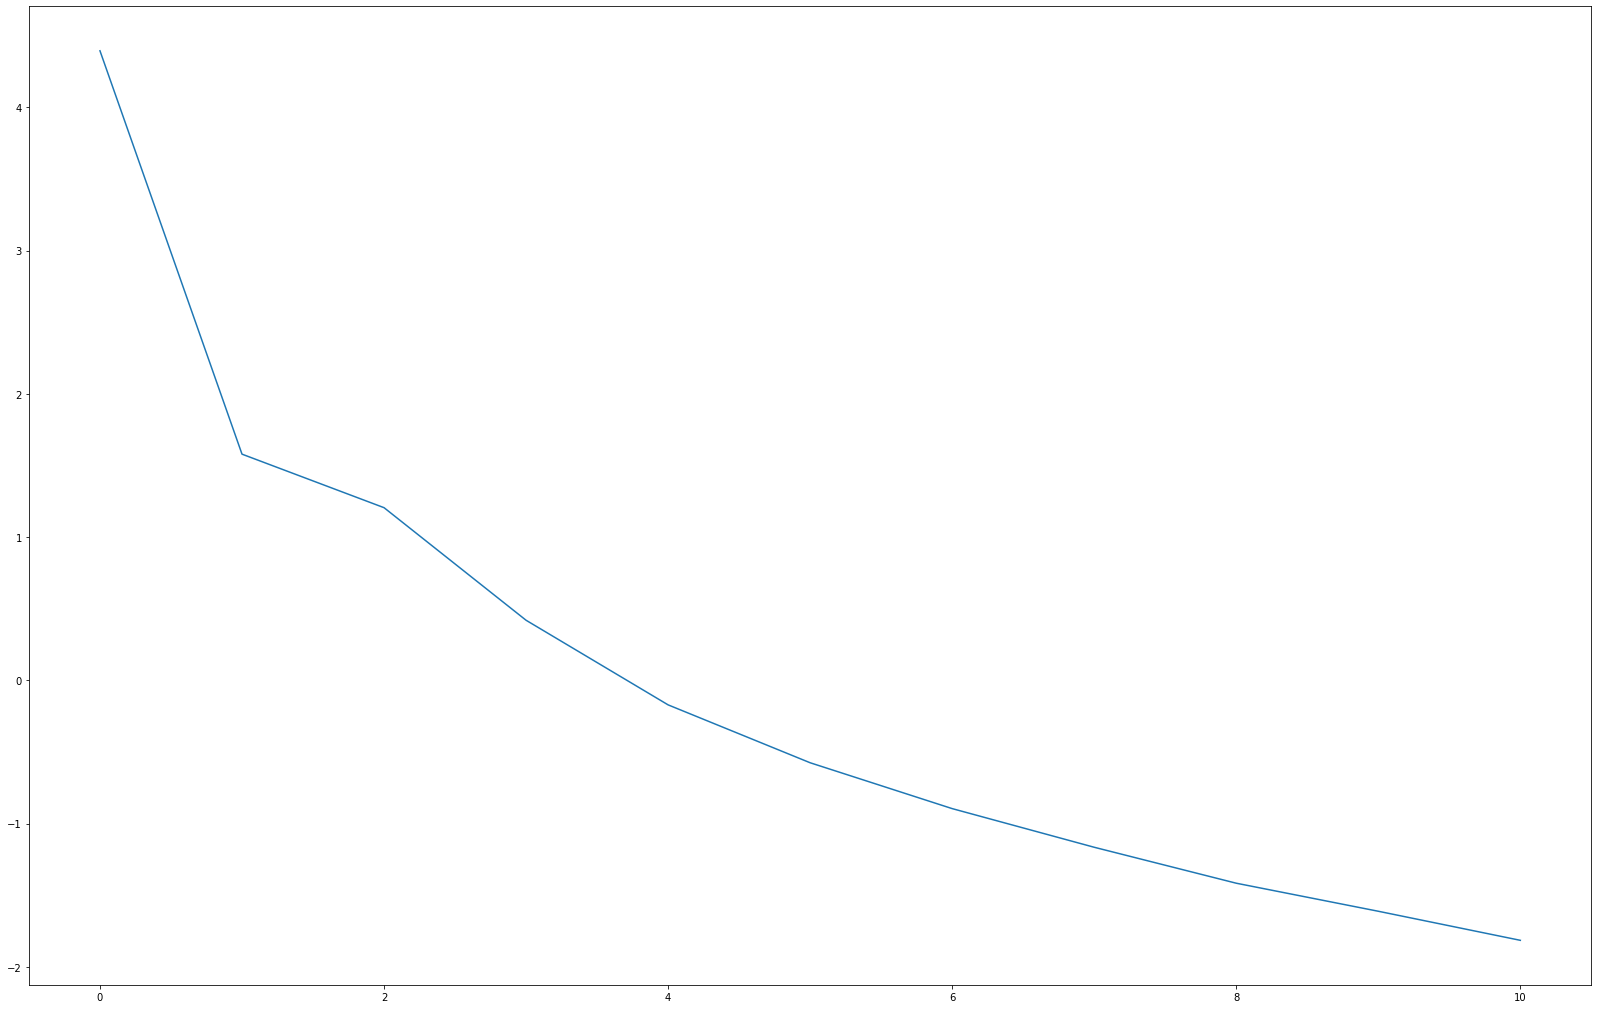

In [13]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14*2, 9*2)

plt.plot(np.log(losses))

### Generate Predictions

In [14]:
out_s = []

model.eval()

out_X_s = torch.split(train_X_s, train_X_s.shape[0], dim=0)
out_y_s = torch.split(train_X_s, train_y_s.shape[0], dim=0)

for X, y in zip(out_X_s, out_y_s):
    with torch.no_grad():
        pred = model(X)
        cur_out = pred.cpu().detach()
        if cur_out.shape[0] == X.shape[0]:
            out_s = cur_out
        else:
            out_s.append(cur_out)

### Plot Pred

In [15]:
from matplotlib import cm

def plot_mel_spectrogram(mel_spec, title):
    fig, ax = plt.subplots(1)

    ax.set_title(f"Mel Spectogram \"{title}\"")
    pred = np.swapaxes(mel_spec, 0, 1)
    cax = ax.imshow(pred, interpolation='nearest', cmap=cm.coolwarm, origin='lower')

    return fig

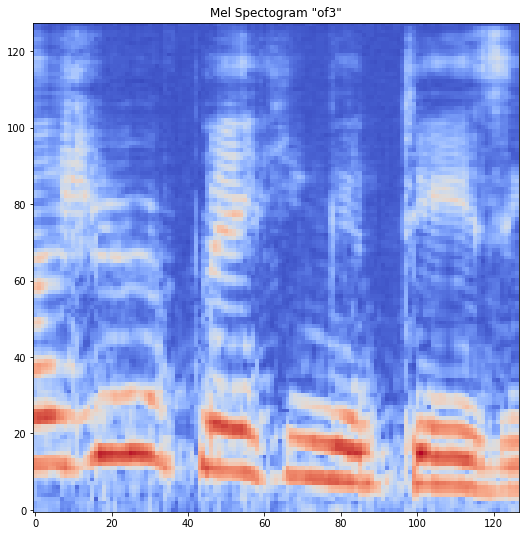

In [24]:
# plt.rcParams["figure.figsize"] = (14*2, 9*2)
plt.rcParams["figure.figsize"] = (14, 9)

plot_pred_idx = 3

y = torch.squeeze(out_s[plot_pred_idx], 0).float()
_ = plot_mel_spectrogram(y, synth_examples[plot_pred_idx]["label"] + str(plot_pred_idx))

### Plot Original

6 3


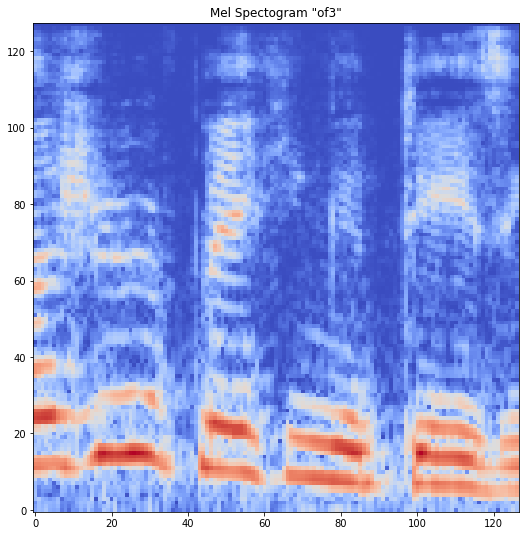

In [25]:
print(len(synth_examples), plot_pred_idx)

cur_data   = synth_examples[plot_pred_idx]
#cur_data_d = cur_data["audio_feats"][:cur_data["audio_feats"].shape[1], :]
cur_data_d = cur_data["audio_feats"]

# full ground truth
_ = plot_mel_spectrogram(
    cur_data_d,
    cur_data["label"] + str(plot_pred_idx))

## Synthesis (Generalise)

### Model

In [16]:
import torch.nn as nn
import torch.nn.functional as F

from lib.transformer import *

class ProposedModel(nn.Module):
    def __init__(self,
                 model_size,
                 dropout=0.2,
                 num_layers=6,
                 n_heads=8,
                 dim_feedforward=3072,
                 out_dim=80,
                 use_resnet=False):
        super().__init__()
        self.use_resnet = use_resnet

        if use_resnet:
            self.conv_1 = ResBlock(60, model_size, 2)
            self.conv_2 = ResBlock(model_size, model_size, 2)
            """
            self.conv_blocks = nn.Sequential(
                ResBlock(60, model_size, 2),
                ResBlock(model_size, model_size, 2),
                # (Removed as 400>200>100hz, instead of 800>400>200>100hz)
                # ResBlock(model_size, model_size, 2),
            )
            """
            self.w_raw_in = nn.Linear(model_size, model_size)

        encoder_layer = TransformerEncoderLayer(
            d_model=model_size,
            nhead=n_heads,
            relative_positional=True,
            relative_positional_distance=100,
            dim_feedforward=dim_feedforward,
            dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.w_out = nn.Linear(model_size, out_dim)
    
    def forward(self, x):
        # (Optional) ResNet Blocks
        if self.use_resnet:
            # x shape is (batch, time, electrode)
            #print("use_resnet->x.shape: start", x.shape, x.dtype)
            x = x.transpose(1, 2)
            #print("use_resnet->x.shape: transpose(1, 2)", x.shape, x.dtype)
            # x = self.conv_blocks(x)
            # print("use_resnet->x.shape: conv_blocks", x.shape, x.dtype)

            x = self.conv_1(x)
            #print("use_resnet->x.shape: self.conv_1", x.shape, x.dtype)
            x = self.conv_2(x)
            #print("use_resnet->x.shape: self.conv_2", x.shape, x.dtype)
            
            x = x.transpose(1, 2)
            #print("use_resnet->x.shape: transpose(1, 2)", x.shape, x.dtype)
            x = self.w_raw_in(x)
            #print("use_resnet->x.shape: w_raw_in", x.shape, x.dtype)

        # Transformer
        x = x.transpose(0, 1)
        x = self.transformer(x)
        x = x.transpose(0, 1)

        # Final MLP
        x = self.w_out(x)

        return x


class ResBlock(nn.Module):
    def __init__(self, num_ins, num_outs, stride=1):
        super().__init__()

        self.conv1 = nn.Conv1d(num_ins, num_outs, 3, padding=1, stride=stride)
        self.bn1 = nn.BatchNorm1d(num_outs)
        self.conv2 = nn.Conv1d(num_outs, num_outs, 3, padding=1)
        self.bn2 = nn.BatchNorm1d(num_outs)

        if stride != 1 or num_ins != num_outs:
            self.residual_path = nn.Conv1d(num_ins, num_outs, 1, stride=stride)
            self.res_norm = nn.BatchNorm1d(num_outs)
        else:
            self.residual_path = None

    def forward(self, x):
        input_value = x

        x = F.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))

        if self.residual_path is not None:
            res = self.res_norm(self.residual_path(input_value))
        else:
            res = input_value

        return F.relu(x + res)

### Select Model

In [17]:
import torch
import random

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

device = "cuda" if torch.cuda.is_available() else "cpu"

ins = dataset.num_features
outs = 128 # mel bins

model_type = "res-trans" # "transformer" # "res-trans"

if model_type == "lstm":
    model = DigitalVoicingModel(
        ins=ins,
        model_size=128,
        n_layers=2,
        dropout=0.0,
        outs=outs).to(device)
elif model_type == "transformer":
    model = ProposedModel(\
        model_size=ins,
        dropout=0.2,  # 0.2,
        num_layers=8,
        n_heads=2,
        dim_feedforward=3072,
        out_dim=outs).to(device)
elif model_type == "res-trans":
    model_size = 768
    model = ProposedModel(\
        model_size=model_size,
        dropout=0.2,
        num_layers=8,
        n_heads=2,
        dim_feedforward=3072,
        out_dim=outs,
        use_resnet=True).to(device)

In [18]:
if dataset.max_items:
    print(set(dataset.labels[0:dataset.max_items]))
else:
    # print(set(dataset.labels))
    print("of" in list(dataset.labels))

True


### Create Trainset, Testset

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.nn.utils.rnn import pad_sequence

from torch.cuda.amp.grad_scaler import GradScaler

# Create one large batch of all examples (speed up training)
# If including a lot of the dataset, turn this off as it will not fit in VRAM

X_s = []
y_s = []

batch_size = 32

# Set examples
target_labels  = ["a"]

target_idx_s   = [dataset.get_label_idxs(target_label)
                  for target_label in target_labels]
# print("target_idx_s:", target_idx_s)

# target_idx_s   = [list(range(1, 51))]
# target_idx_s   = [list(range(len(dataset)))]
# target_idx_s   = [list(range(0, 101))]
synth_examples = [[dataset[target_idx]
                   for target_idx in target_idxs]
                  for target_idxs in target_idx_s]

flatten = lambda lst: [item for sublist in lst for item in sublist]
ratio = 0.9
synth_examples = flatten(synth_examples) # If using matched idxs, enable this
pivot_point    = int(len(synth_examples) * ratio)

input_feature  = "eeg_raw"
output_feature = "audio_feats"
pad_len_x = max([eg[input_feature].shape[0] for eg in synth_examples])
pad_len_y = max([eg[output_feature].shape[0] for eg in synth_examples])
if input_feature == "eeg_raw":
    ins = 60 # input channels, 60 instead of 62 because last 2 are reference electrodes for brennan 2019 (left and right mastoid regions)
else:
    ins = 300

for i, synth_example in enumerate(synth_examples):
    X = torch.tensor(synth_example[input_feature])
    y = torch.tensor(synth_example[output_feature])
    
    clip_len = min(X.shape[0], y.shape[0])
    X = X[:, :ins]
    
    if not input_feature == "eeg_raw":
        X = X[:clip_len, :ins] # Same len
        y = y[:clip_len, :]    # Same len
        X_padding = torch.zeros(pad_len_y - X.shape[0], X.shape[1])
        X = torch.cat((X, X_padding), dim=0)

    y_padding = torch.zeros(pad_len_y - y.shape[0], y.shape[1])
    y = torch.cat((y, y_padding), dim=0)

    X = torch.unsqueeze(X, 0).to(device)
    y = torch.unsqueeze(y, 0).to(device)

    X_s.append(X)
    y_s.append(y)

print("pivot_point:", pivot_point)

train_X_s = X_s[:pivot_point]
train_y_s = y_s[:pivot_point]
train_X_s = pad_sequence(train_X_s, batch_first=True)
train_y_s = pad_sequence(train_y_s, batch_first=True)

train_X_s = torch.squeeze(train_X_s, 1)
train_y_s = torch.squeeze(train_y_s, 1)
train_X_s = torch.split(train_X_s, batch_size, dim=0)
train_y_s = torch.split(train_y_s, batch_size, dim=0)

test_X_s = X_s[pivot_point:]
test_y_s = y_s[pivot_point:]
test_X_s = pad_sequence(test_X_s, batch_first=True)
test_y_s = pad_sequence(test_y_s, batch_first=True)

test_X_s = torch.squeeze(test_X_s, 1)
test_y_s = torch.squeeze(test_y_s, 1)
test_X_s = torch.split(test_X_s, batch_size, dim=0)
test_y_s = torch.split(test_y_s, batch_size, dim=0)

print(
    train_X_s[0].shape,
    train_y_s[0].shape,
    test_X_s[0].shape,
    test_y_s[0].shape)

### Create Dataset

In [19]:
patience = 5
lr = 3e-4 # 1e-3 # 5e-4 # 1e-3 # (3e-4) # (1e-4)
optim = torch.optim.Adam(model.parameters(), lr=lr)
lr_sched = \
    torch.optim.lr_scheduler.ReduceLROnPlateau(\
        optim, 'min', 0.5, patience=patience)

amp = True

epochs = 20_000 # 10_000

scaler = GradScaler()

criteria = nn.MSELoss()

pred_s  = []
losses  = []
vlosses = []

def test(model):
    model.eval()

    losses = []

    for batch_x, batch_y in zip(test_X_s, test_y_s):
        with torch.no_grad():
            with torch.autocast(
            enabled=amp,
            dtype=torch.bfloat16,
            device_type=device):
                pred = model(batch_x.bfloat16())
                if pred.shape[1] != batch_y.shape[1]:
                    pred = pred[:, :batch_y.shape[1], :]
                loss = criteria(pred, batch_y)
                losses.append(loss.detach().cpu())

    return loss

def train(model):
    model.train()

    losses = []

    optim.zero_grad()

    batch_idx = 0
    for batch_x, batch_y in zip(train_X_s, train_y_s):
        with torch.autocast(
            enabled=amp,
            dtype=torch.bfloat16,
            device_type=device):

            #print("batch_x.dtype:", batch_x.shape, batch_x.dtype) # 64
            #print("batch_y.dtype:", batch_y.shape, batch_y.dtype) # 32
            pred = model(batch_x.bfloat16())
            #print("batch_idx, batch_x.shape, batch_y.shape, pred.shape")
            #print("Batch:", batch_idx, batch_x.shape, batch_y.shape, pred.shape)
            #print("pred.dtype, pred.shape, batch_y.dtype:", pred.dtype, pred.shape, batch_y.dtype) # 32
            if pred.shape[1] != batch_y.shape[1]:
                pred = pred[:, :batch_y.shape[1], :]
            loss = criteria(pred, batch_y)
            losses.append(loss.detach().cpu())

            scaler.scale(loss).backward()
            scaler.step(optim)
            scaler.update()
        batch_idx += 1
    # scheduler.step()

    return loss

def go(model):
    for i in range(epochs):
        loss = train(model)
        vloss = test(model)
        # lr_sched.step(vloss)
        if i % 10 == 0:
            losses.append(loss.item())
            vlosses.append(vloss.item())
            print(i, loss.item(), vloss.item(), )

go(model)

# x shape is (batch, time, electrode)

pivot_point: 46
torch.Size([32, 520, 60]) torch.Size([32, 127, 128]) torch.Size([6, 520, 60]) torch.Size([6, 127, 128])
0 64.99018859863281 59.28202438354492
10 21.1842041015625 19.381391525268555
20 7.083732604980469 6.698484420776367
30 5.978590488433838 5.781439781188965
40 5.980772495269775 5.781508922576904
50 5.978158473968506 5.782841205596924
60 5.963584899902344 5.78204345703125
70 5.904773712158203 5.809762954711914
80 5.834702491760254 5.8013834953308105
90 5.815720558166504 5.794501304626465
100 5.822294235229492 5.79166841506958
110 5.771489143371582 5.791446685791016
120 5.770268440246582 6.047001838684082
130 5.773555278778076 5.780297756195068
140 5.774604797363281 5.9005961418151855
150 5.771808624267578 5.805493354797363
160 5.809635162353516 5.805996417999268
170 5.780094623565674 5.819637298583984
180 5.786215305328369 5.796138286590576
190 5.780256271362305 5.796021461486816
200 5.77422571182251 5.813662528991699
210 5.7927327156066895 5.798087120056152
220 5.76888

KeyboardInterrupt: 

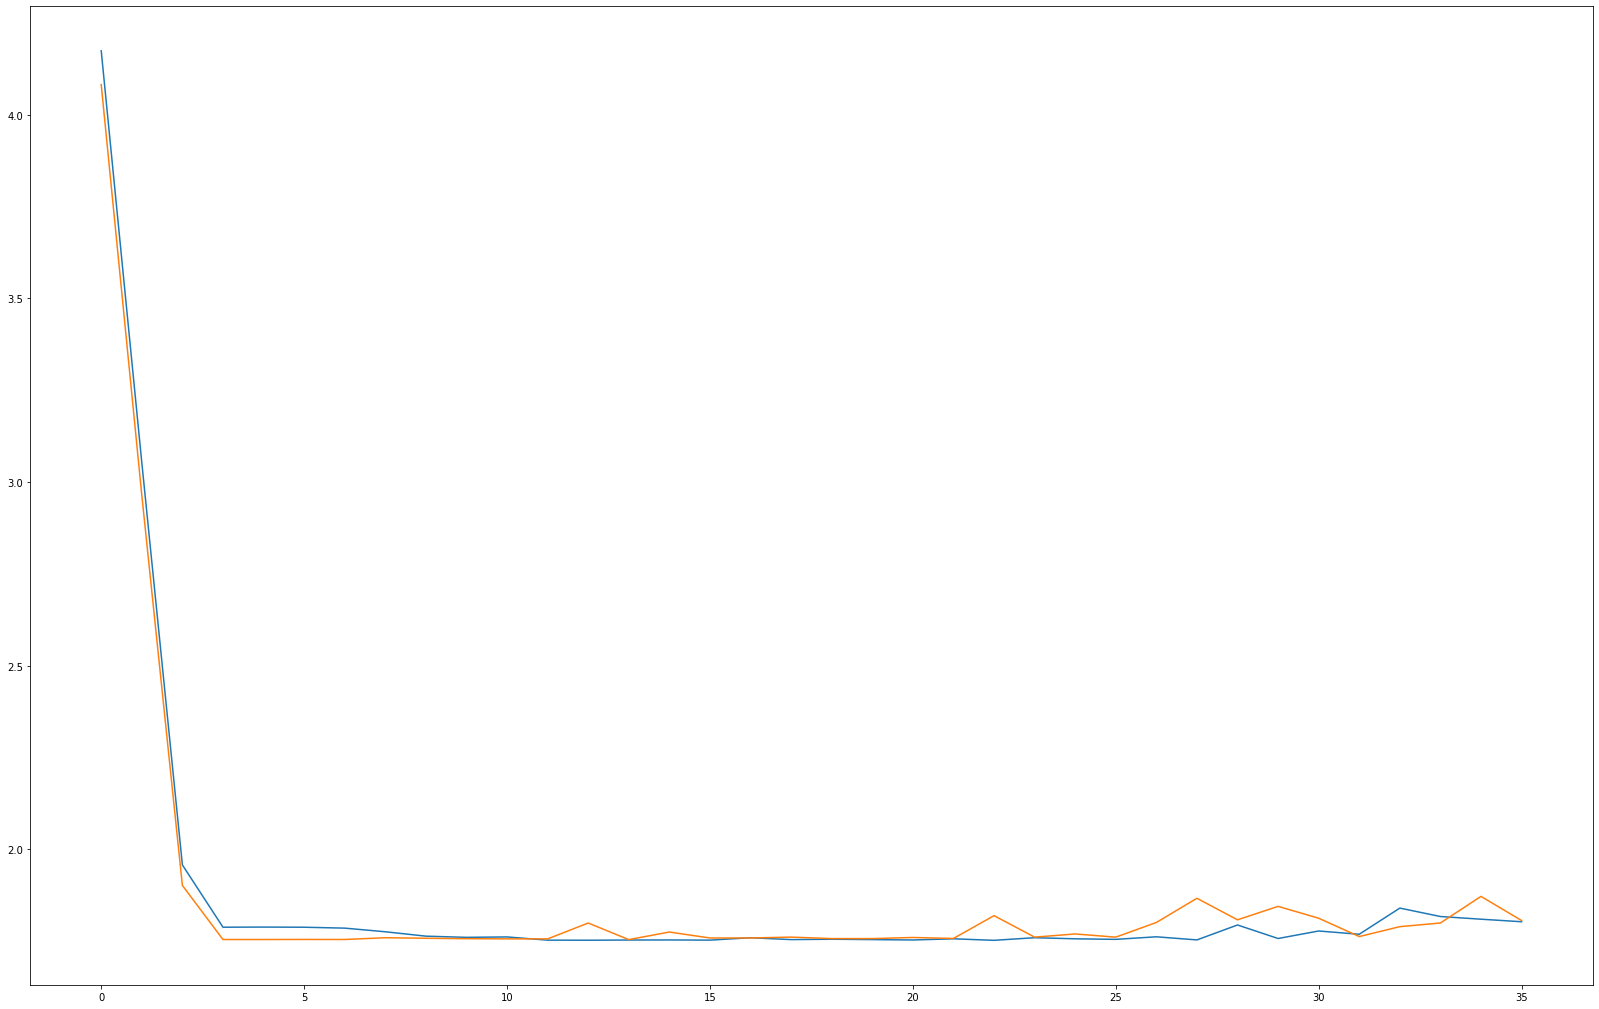

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14*2, 9*2)

plt.plot(np.log(losses))
plt.plot(np.log(vlosses))

### Generate Predictions

In [24]:
out_s = []

model.eval()

cur_test_X_s = torch.cat(tuple(test_X_s), dim=0)
cur_test_y_s = torch.cat(tuple(test_y_s), dim=0)

out_X_s = torch.split(cur_test_X_s, cur_test_X_s.shape[0], dim=0)
out_y_s = torch.split(cur_test_y_s, cur_test_y_s.shape[0], dim=0)

for X, y in zip(out_X_s, out_y_s):
    with torch.no_grad():
        print(X.shape)
        pred = model(X.bfloat16())
        cur_out = pred.cpu().detach()
        if cur_out.shape[0] == X.shape[0]:
            out_s = cur_out
        else:
            out_s.append(cur_out)

RuntimeError: zero-dimensional tensor (at position 0) cannot be concatenated

### Plot Pred

In [31]:
from matplotlib import cm

def plot_mel_spectrogram(mel_spec, title):
    fig, ax = plt.subplots(1)

    ax.set_title(f"Mel Spectogram \"{title}\"")
    pred = np.swapaxes(mel_spec, 0, 1)
    cax = ax.imshow(pred, interpolation='nearest', cmap=cm.coolwarm, origin='lower')

    return fig

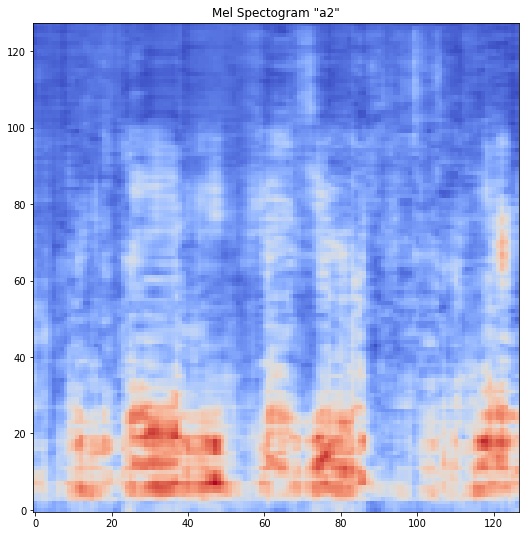

In [44]:
# plt.rcParams["figure.figsize"] = (14*2, 9*2)
plt.rcParams["figure.figsize"] = (14, 9)

plot_pred_idx = 2

"""
# half pred
y = torch.squeeze(out_s[plot_pred_idx], 0).float()
_ = plot_mel_spectrogram(y[:y.shape[0]//2, :], synth_examples[pivot_point:][plot_pred_idx]["label"] + str(plot_pred_idx))
"""

y = torch.squeeze(out_s[plot_pred_idx], 0).float()
_ = plot_mel_spectrogram(y, synth_examples[pivot_point:][plot_pred_idx]["label"] + str(plot_pred_idx))

### Plot Original

6 2


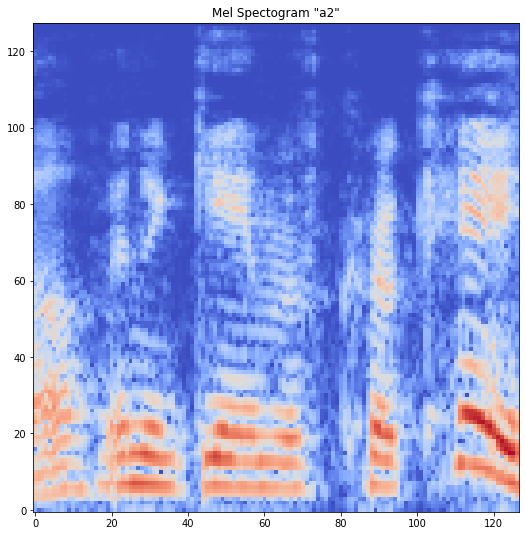

In [45]:
print(len(synth_examples[pivot_point:]), plot_pred_idx)

cur_data   = synth_examples[pivot_point:][plot_pred_idx]
#cur_data_d = cur_data["audio_feats"][:cur_data["audio_feats"].shape[1], :]
cur_data_d = cur_data["audio_feats"]

"""
# half ground truth
_ = plot_mel_spectrogram(
    cur_data["audio_feats"][:cur_data["audio_feats"].shape[0]//5, :],
    cur_data["label"] + str(plot_pred_idx))
"""

# full ground truth
_ = plot_mel_spectrogram(
    cur_data_d,
    cur_data["label"] + str(plot_pred_idx))

### Save Pred

In [ ]:
mel_to_save = torch.squeeze(out_s[plot_pred_idx], 0)[:, :80].float()
mel_to_save = torch.tensor(mel_to_save)
mel_fname   = synth_examples[pivot_point:][plot_pred_idx]["label"]
mel_fname   = mel_fname[1:-1] if mel_fname[0] == "/" else mel_fname
mel_fname   = f"{mel_fname}_pred.pt"
print(mel_to_save.shape)
torch.save(mel_to_save.T, mel_fname)

### Validate Testset Audio Features

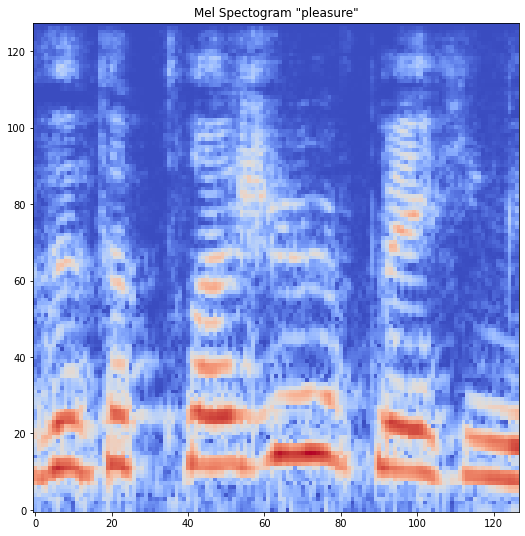

In [433]:
d = dataset[82]
_ = plot_mel_spectrogram(d["audio_feats"], d["label"])